In [1]:
import pandas as pd
import numpy as np

# Machine Learning utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


We analyze the dataset to understand its structure, data types, and potential issues such as missing values.


In [ ]:

data = pd.read_csv("/Users/bot/Documents/GitHub/Assignments-BOT/adult.csv")  

data.head()  # Display first 5 rows


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# Check dataset structure and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Check missing values in each column
data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
# Statistical summary of numerical features

data.describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Check unique values for categorical columns (to detect '?')
for col in data.columns:
    if data[col].dtype == "object":
        print(col, ":", data[col].unique()[:5])


workclass : ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc']
education : ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate']
marital.status : ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse']
occupation : ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service']
relationship : ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband']
race : ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex : ['Female' 'Male']
native.country : ['United-States' '?' 'Mexico' 'Greece' 'Vietnam']
income : ['<=50K' '>50K']


In [9]:
# Check if '?' exists in dataset
(data == "?").sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In the Adult dataset, missing values are represented using '?' in categorical columns
such as workclass, occupation, and native.country.

Instead of dropping rows directly, we replace '?' with NaN and then impute missing
values using the mode (most frequent category). This approach preserves data and
improves model robustness.


In [10]:

missing_cols = ["workclass", "occupation", "native.country"]

# Replace '?' with NaN
for col in missing_cols:
    data[col] = data[col].replace("?", np.nan)

# Check missing values
print("Missing values after replacing '?':\n")
print(data.isnull().sum())


Missing values after replacing '?':

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [11]:

for col in missing_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Verify missing values are handled
print("\nMissing values after imputation:\n")
print(data.isnull().sum())



Missing values after imputation:

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


/var/folders/hx/5f2h43h97hq1w3xb9xj8r4fr0000gn/T/ipykernel_3304/1014177850.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [12]:

X = data.drop("income", axis=1)
y = data["income"]

# Encode target variable: >50K → 1, <=50K → 0
y = y.apply(lambda x: 1 if x.strip() == ">50K" else 0)


In [13]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns

print("Categorical Columns:", categorical_cols.tolist())
print("Numerical Columns:", numerical_cols.tolist())


Categorical Columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
Numerical Columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [14]:
# Preprocessing Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


In [15]:

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## Gini Impurity vs Entropy

Gini Impurity measures the probability of misclassification of a randomly chosen element.
##### WHERE AS
Entropy measures the amount of randomness or uncertainty in a dataset or node's class distribution.

- Gini is computationally efficient and widely used in CART algorithms.
- Entropy is based on information theory and used in calculating information gain.

## Overfitting in Decision Trees

Decision Trees tend to overfit because they can grow very deep and memorize training data. Due to intense depth the decision tree tend to learn noise too along with the patterns.
This results in poor generalization on unseen data.

## Role of Hyperparameters

- max_depth: Limits the depth of the tree.
- min_samples_split: Minimum samples required to split a node.
- min_samples_leaf: Minimum samples required in a leaf node.


In [17]:
# Decision Tree Model

dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Train model
dt_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:

# Evaluate Decision Tree

y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)


Decision Tree Performance:
Accuracy: 0.8142177184093352
Precision: 0.6096813725490197
Recall: 0.6345663265306123


## Bagging (Bootstrap Aggregating)

Bagging involves training multiple models on different bootstrap samples of the dataset.
Final predictions are obtained using majority voting, reducing variance.

## Why Random Forests Reduce Overfitting

Random Forests reduce overfitting by:
1. Training multiple trees on different bootstrap samples.
2. Selecting random subsets of features at each split.
3. One tree may overfit.But many trees make different mistakes.When you average them, mistakes cancel out.
4. So variance decreases and model becomes stable

## Feature Importance

Feature importance indicates how much each feature contributes to model predictions.


In [19]:
# Random Forest Model

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
rf_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [20]:
# Evaluate Random Forest


y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)


Random Forest Performance:
Accuracy: 0.8535237217871948
Precision: 0.7301349325337332
Recall: 0.6211734693877551


In [22]:
# Compare Decision Tree vs Random Forest

comparison_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [dt_accuracy, rf_accuracy],
    "Precision": [dt_precision, rf_precision],
    "Recall": [dt_recall, rf_recall]
})

comparison_df


,Model,Accuracy,Precision,Recall
0,Decision Tree,0.814218,0.609681,0.634566
1,Random Forest,0.853524,0.730135,0.621173


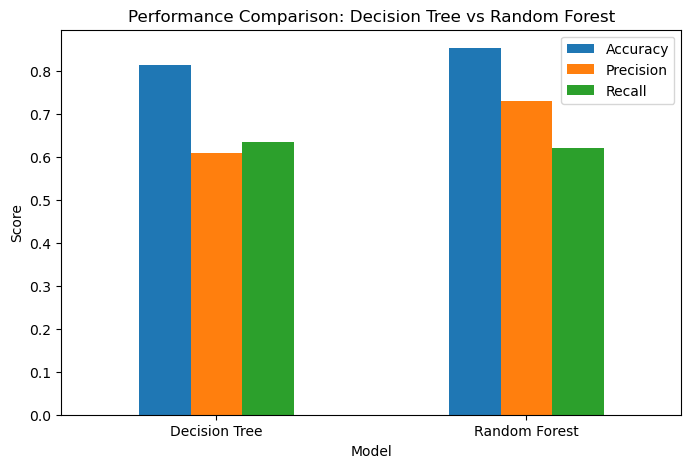

In [23]:
# Plot comparison of models
comparison_df.set_index("Model").plot(kind="bar", figsize=(8,5))
plt.title("Performance Comparison: Decision Tree vs Random Forest")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


In [24]:
# Feature Importance from Random Forest

# Extract feature names after preprocessing
feature_names = rf_model.named_steps["preprocessor"].get_feature_names_out()

# Get feature importance scores
importances = rf_model.named_steps["classifier"].feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top 15 important features
feature_importance_df.head(15)


,Feature,Importance
99,num__fnlwgt,0.160253
98,num__age,0.148963
101,num__capital.gain,0.095050
103,num__hours.per.week,0.083986
100,num__education.num,0.066089
26,cat__marital.status_Married-civ-spouse,0.065339
45,cat__relationship_Husband,0.052652
102,num__capital.loss,0.031525
28,cat__marital.status_Never-married,0.021481
34,cat__occupation_Exec-managerial,0.018331


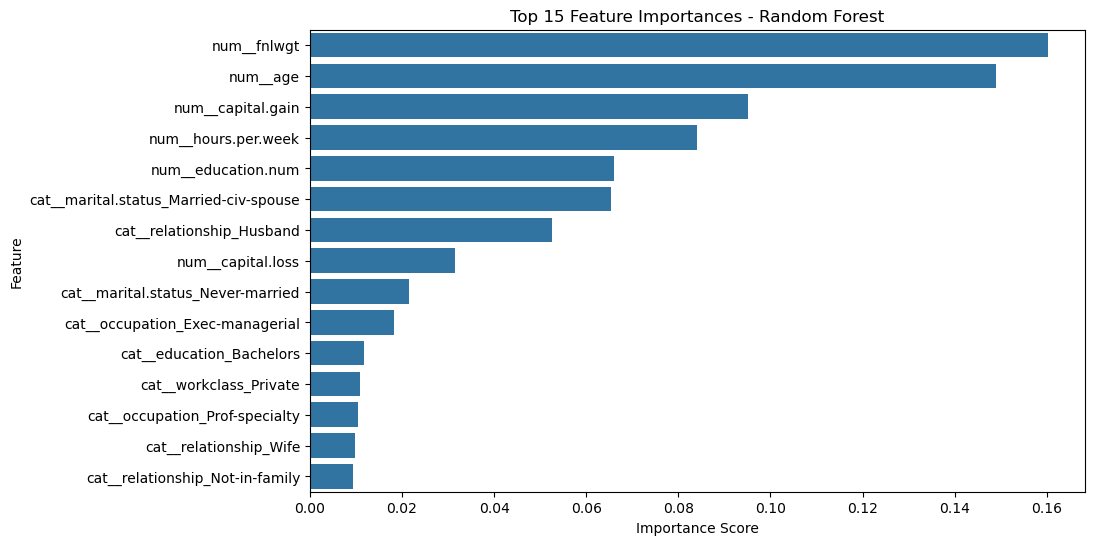

In [25]:
# Plot top 15 important features
top_features = feature_importance_df.head(15)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=top_features)
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### Interpretation of Results

From the comparison, Random Forest outperforms the Decision Tree in terms of accuracy,
precision, and recall. This confirms that ensemble methods reduce overfitting and improve
model performance.

Feature importance analysis shows that variables such as education, age, hours-per-week,
capital gain, and occupation play a significant role in predicting income.


## Boosting vs Bagging

- Bagging trains models independently. It focuses on stability and reduces overfitting.
- Boosting trains models sequentially, where each model corrects previous errors. In this way focus on accuracy increases.

## Sequential Learning

Sequential learning is a training approach where models are built one after another, and each new model focuses on correcting the errors made by the previous models. It is commonly used in boosting algorithms like Gradient Boosting, XGBoost, and LightGBM.

## Learning Rate

Learning rate is a hyperparameter that controls how much a model updates itself in each step while learning from errors.Learning rate decides how fast or how slowly a model learns.


In [26]:
# Gradient Boosting Model

gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        random_state=42
    ))
])

# Train model
gb_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
# Evaluate Gradient Boosting

y_pred_gb = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)

print("Gradient Boosting Performance:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)


Gradient Boosting Performance:
Accuracy: 0.8642714570858283
Precision: 0.7692913385826772
Recall: 0.6230867346938775


In [28]:
# Compare Random Forest vs Gradient Boosting

comparison_part3_df = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting"],
    "Accuracy": [rf_accuracy, gb_accuracy],
    "Precision": [rf_precision, gb_precision],
    "Recall": [rf_recall, gb_recall]
})

comparison_part3_df


,Model,Accuracy,Precision,Recall
0,Random Forest,0.853524,0.730135,0.621173
1,Gradient Boosting,0.864271,0.769291,0.623087


### Conclusion from Model Comparison

From the results, we observe that:

- Random Forest performs well due to bagging and feature randomness.
- Gradient Boosting improves performance by sequentially correcting errors of previous models.
- If Gradient Boosting shows higher accuracy and recall, it indicates better learning of complex patterns.
- If Random Forest performs better, it suggests the dataset benefits more from variance reduction.

Overall, ensemble models significantly outperform a single Decision Tree, demonstrating
the power of advanced machine learning techniques.


In [30]:
# Hyperparameter Tuning (Decision Tree)

param_grid = {
    "classifier__max_depth": [None, 5, 10, 20],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

dt_tuned = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

grid_search = GridSearchCV(
    dt_tuned,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best CV Accuracy: 0.858069677868181


In [31]:
# Evaluate tuned model
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))


Tuned Decision Tree Accuracy: 0.8549055734684478


### Decision Tree Visualization

A Decision Tree model is visualized to understand how features are used to make predictions.
This helps interpret decision rules and model logic.


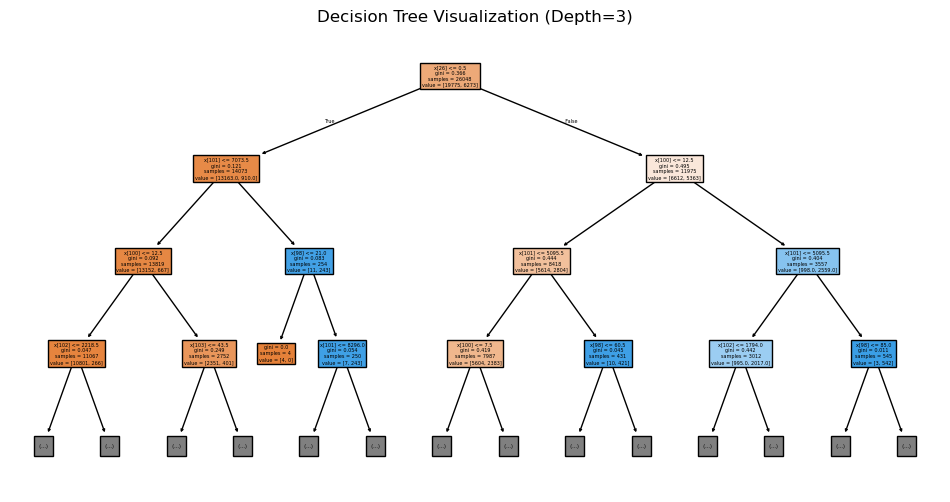

In [32]:
# Visualize Decision Tree (limited depth)
plt.figure(figsize=(12,6))
plot_tree(best_dt.named_steps["classifier"], max_depth=3, filled=True)
plt.title("Decision Tree Visualization (Depth=3)")
plt.show()


### Feature Importance

Feature importance shows which features contribute most to the model’s predictions.
We analyze feature importance from the Random Forest model.


In [33]:
# Extract Random Forest model
rf_classifier = rf_model.named_steps["classifier"]

# Get feature importances
importances = rf_classifier.feature_importances_

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(15)

,Feature,Importance
99,num__fnlwgt,0.160253
98,num__age,0.148963
101,num__capital.gain,0.095050
103,num__hours.per.week,0.083986
100,num__education.num,0.066089
26,cat__marital.status_Married-civ-spouse,0.065339
45,cat__relationship_Husband,0.052652
102,num__capital.loss,0.031525
28,cat__marital.status_Never-married,0.021481
34,cat__occupation_Exec-managerial,0.018331


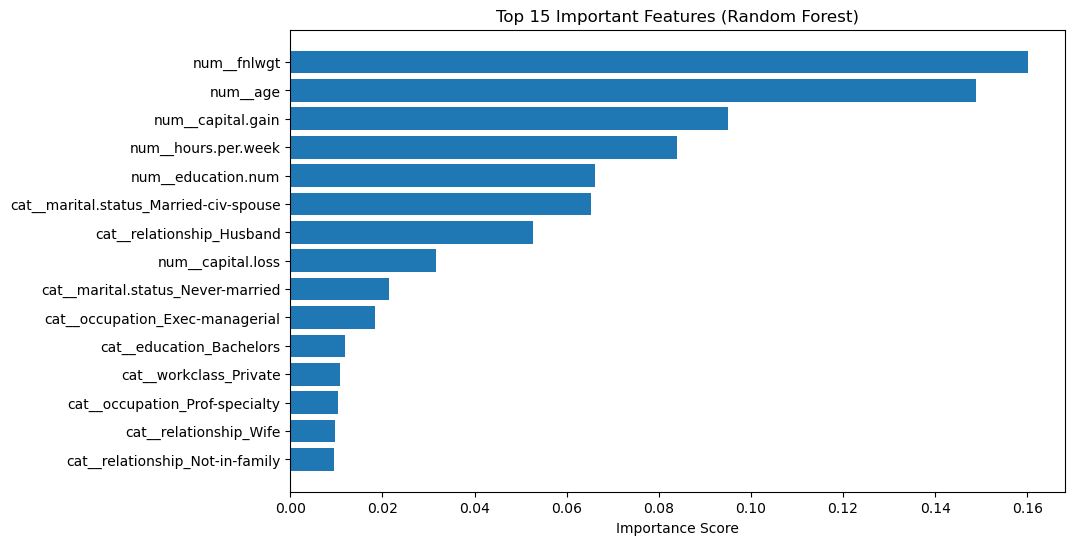

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_features = feature_importance_df.head(15)
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


### SHAP (SHapley Additive exPlanations)

SHAP values explain the contribution of each feature to individual predictions.
This provides a deeper understanding of model behavior.


In [36]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.9/554.9 kB 4.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [shap]


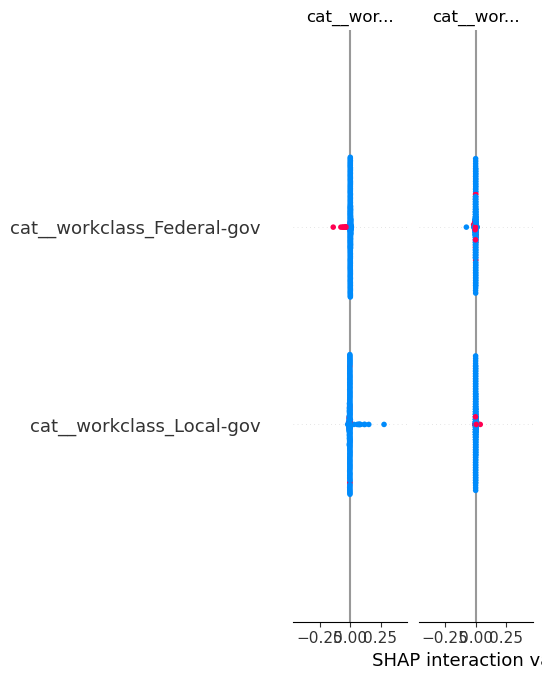

In [41]:
import shap

# Sample the test set
X_sample = X_test.sample(200, random_state=42)

# Transform features using preprocessor
X_sample_transformed = preprocessor.transform(X_sample)

# Convert sparse to dense if needed
if hasattr(X_sample_transformed, "toarray"):
    X_sample_transformed = X_sample_transformed.toarray()

# Ensure numeric type
X_sample_transformed = X_sample_transformed.astype(float)

# Get transformed feature names
feature_names = preprocessor.get_feature_names_out()

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_sample_transformed)

# Handle binary classifier shape issues
if isinstance(shap_values, list):
    shap_values_class1 = shap_values[1]
    # Transpose if SHAP returned (n_features, n_samples)
    if shap_values_class1.shape[0] == X_sample_transformed.shape[1]:
        shap_values_class1 = shap_values_class1.T
else:
    shap_values_class1 = shap_values

# Summary plot
shap.summary_plot(shap_values_class1, X_sample_transformed, feature_names=feature_names)


In [42]:
# Compare all models
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting"],
    "Accuracy": [dt_accuracy, rf_accuracy, gb_accuracy],
    "Precision": [dt_precision, rf_precision, gb_precision],
    "Recall": [dt_recall, rf_recall, gb_recall]
})

results


,Model,Accuracy,Precision,Recall
0,Decision Tree,0.814218,0.609681,0.634566
1,Random Forest,0.853524,0.730135,0.621173
2,Gradient Boosting,0.864271,0.769291,0.623087


## Key Insights

- Decision Tree is simple but prone to overfitting.
- Random Forest significantly improves performance by reducing variance.
- Gradient Boosting provides the best predictive performance due to sequential learning.
- Hyperparameter tuning further enhances model accuracy.
- Feature importance reveals that education, age, hours-per-week, and occupation are key predictors of income.

## Final Conclusion

Ensemble methods outperform a single decision tree on the Adult Census dataset.
Among all models, Random Forest and Gradient Boosting achieve the best performance.
